# GRIB Data Example

This notebook demonstrates how to use `monet-plots` to read a GRIB file and create a spatial plot. It uses a sample ERA5 dataset from the xarray tutorials, including a geographical map using Cartopy.

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from monet_plots.plots.spatial import SpatialPlot
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Load the sample GRIB dataset from xarray tutorials
# This requires the cfgrib engine and its dependencies (like eccodes)
try:
    ds = xr.tutorial.load_dataset('era5-2mt-2019-03-uk.grib', engine='cfgrib')
except Exception as e:
    print(f'Error loading GRIB file: {e}')
    print('Please make sure you have installed the required dependencies for reading GRIB files:')
    print('pip install cfgrib eccodes')
    ds = None

In [8]:
# Inspect the dataset
print(ds)

<xarray.Dataset> Size: 5MB
Dimensions:     (time: 744, latitude: 33, longitude: 49)
Coordinates:
  * time        (time) datetime64[ns] 6kB 2019-03-01 ... 2019-03-31T23:00:00
  * latitude    (latitude) float64 264B 58.0 57.75 57.5 ... 50.5 50.25 50.0
  * longitude   (longitude) float64 392B -10.0 -9.75 -9.5 -9.25 ... 1.5 1.75 2.0
    number      int64 8B 0
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  (time) datetime64[ns] 6kB 2019-03-01 ... 2019-03-31T23:00:00
Data variables:
    t2m         (time, latitude, longitude) float32 5MB 282.4 282.3 ... 281.5
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-20T12:35 GRIB to CDM+CF via cfgrib-0.9.1...


### Create a spatial plot instance with a Cartopy projection

Text(0.5, 1.0, '2m Temperature from ERA5 GRIB Data with Cartopy Map')

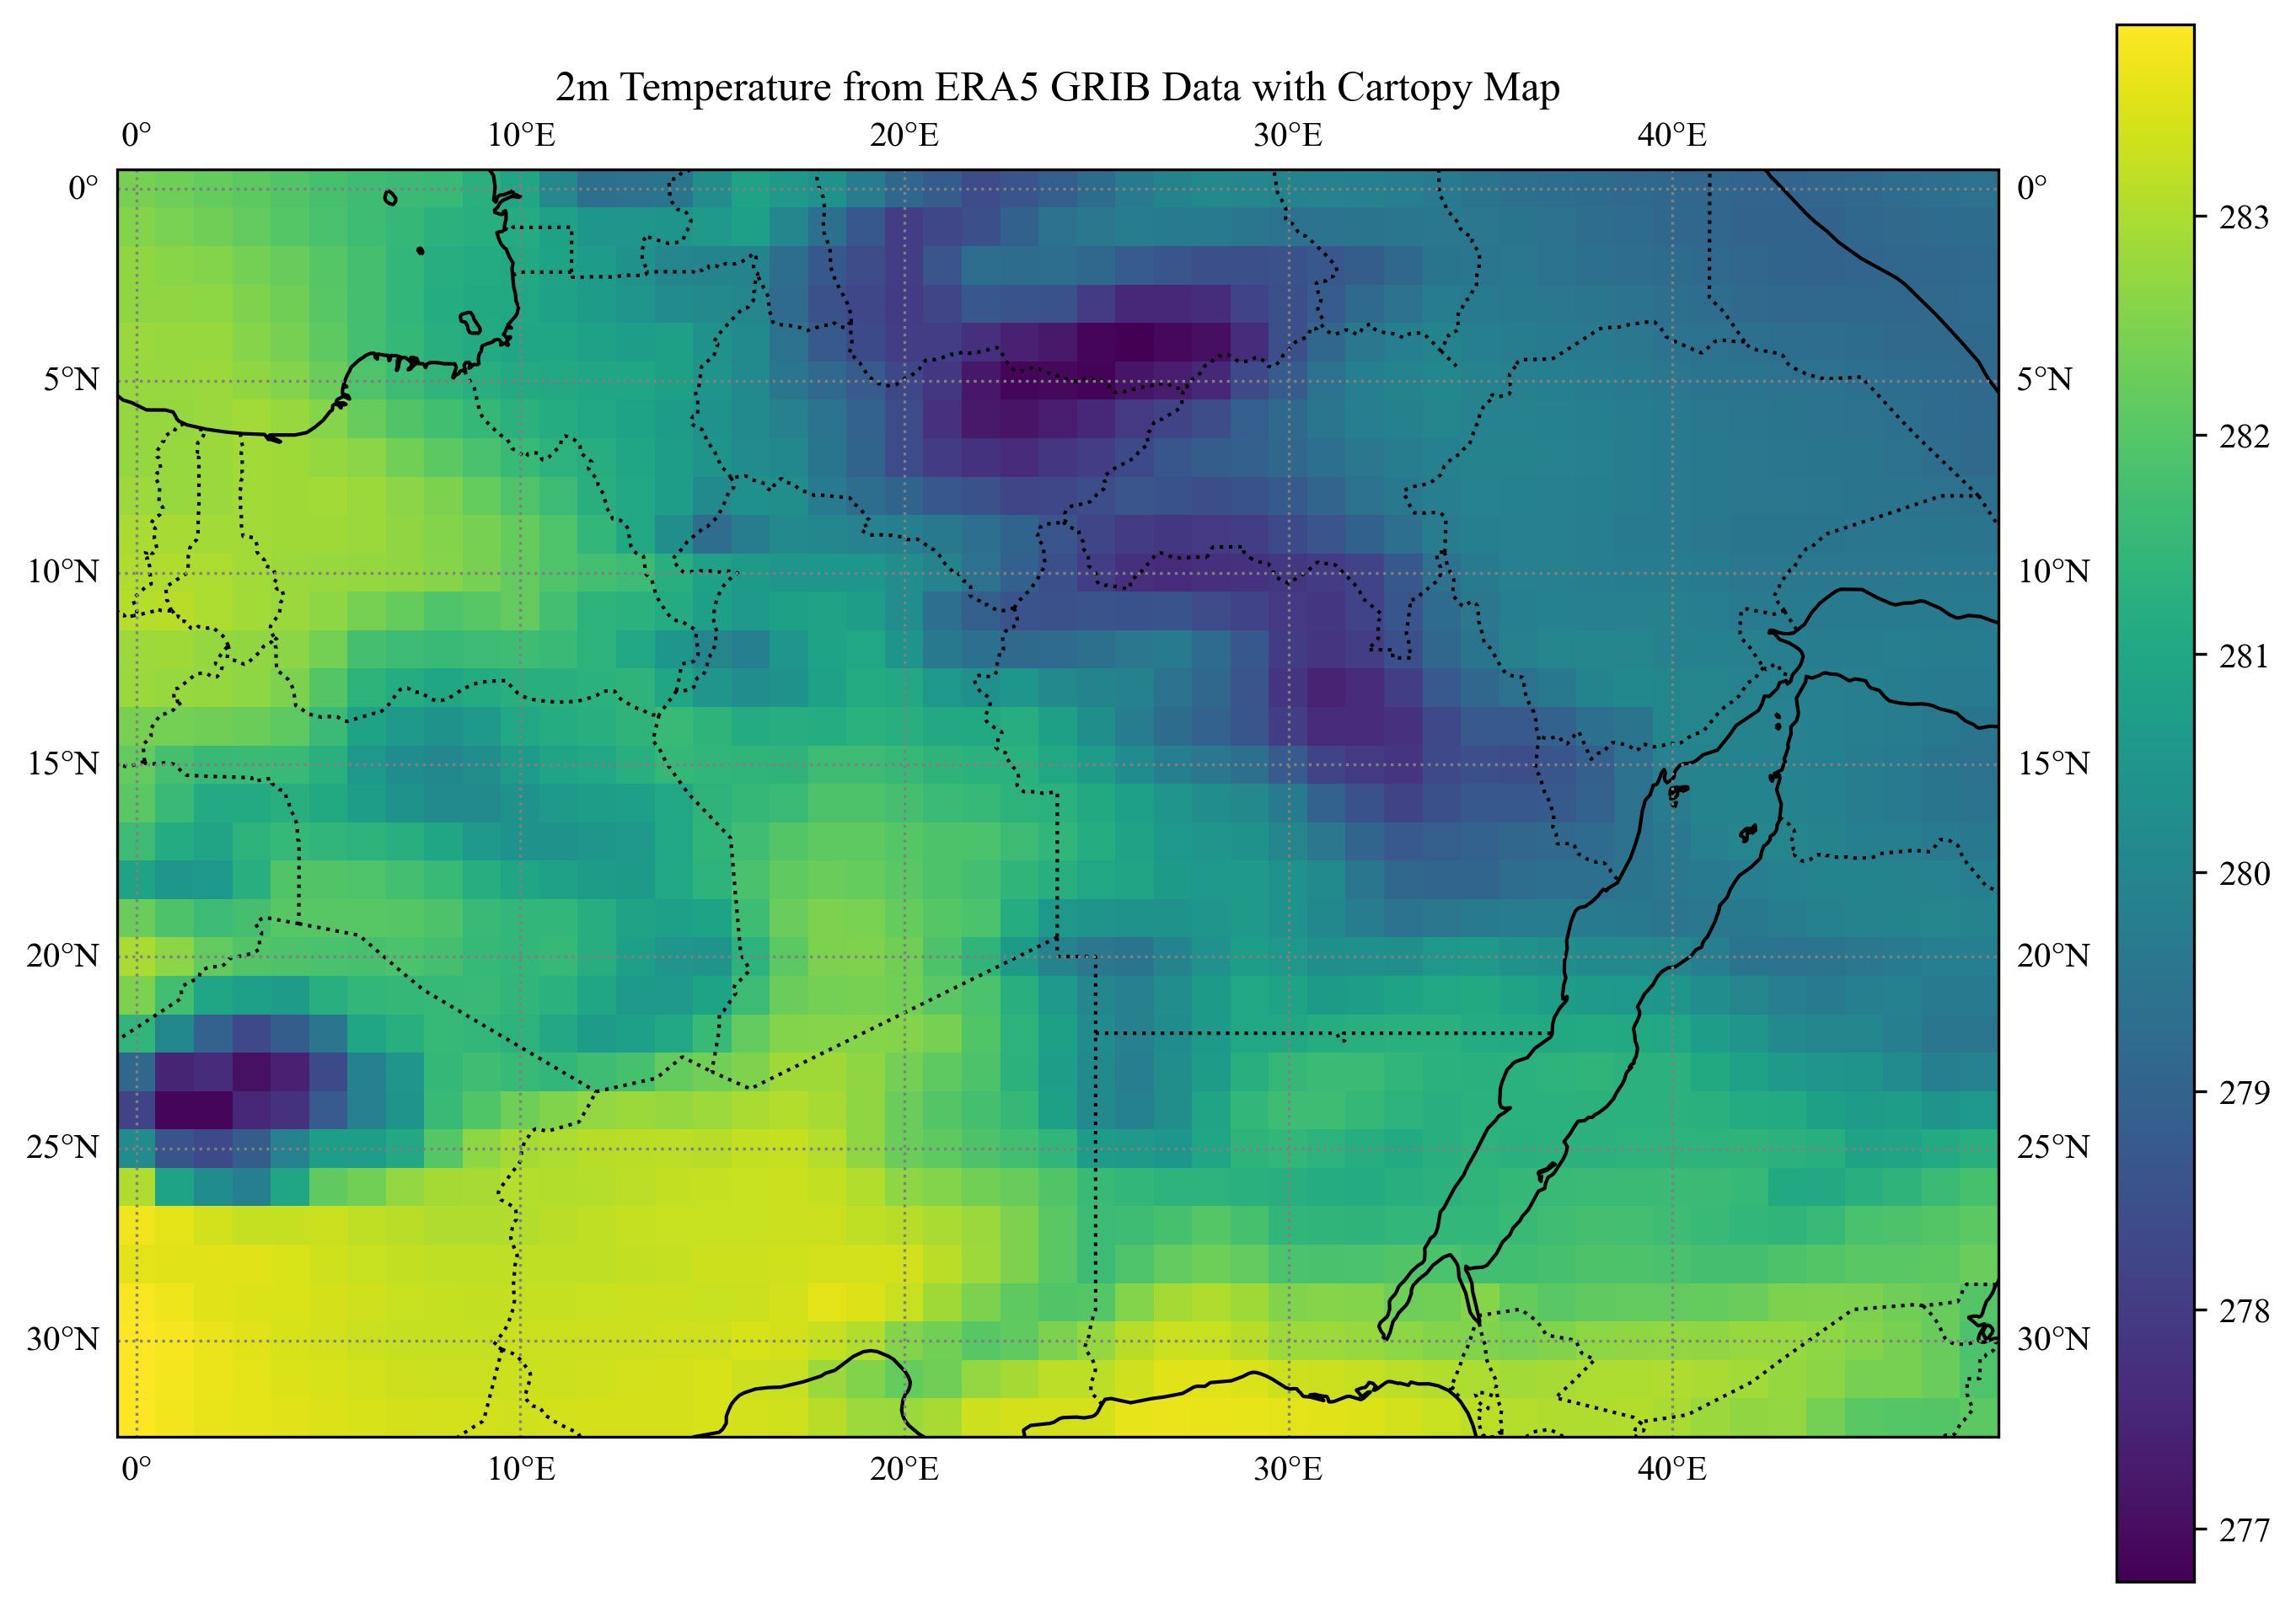

In [11]:
# Select the 2m temperature data for the first time step and plot it
t2m = ds.t2m.isel(time=0)
# Create a spatial plot instance with a Cartopy projection
plot = SpatialPlot(projection=ccrs.PlateCarree(), figsize=(12, 8))
plot.plot(t2m, transform=ccrs.PlateCarree())
plot.ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plot.ax.set_title('2m Temperature from ERA5 GRIB Data with Cartopy Map')